In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Overview

Let's gather all the datasets created previously.

In [ ]:
conf = pd.read_csv('Confident_dataset.csv', index_col=0)


In [ ]:
ref = pd.read_csv('Reflective_dataset.csv', index_col=0)

In [ ]:
ten = pd.read_csv('Tension_dataset.csv', index_col=0)

In [ ]:
pos = pd.read_csv('Positive_dataset.csv', index_col=0)

In [ ]:
ref.shape

(96, 30)

In [ ]:
ref.describe()

,tempo,beats,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rollof,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20
count,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000
mean,116.886300,51.781250,0.309555,0.097671,1134.785228,1430.639461,2084.646095,0.053967,-304.667408,148.648485,19.114179,20.652396,5.188542,1.855439,-4.248391,-2.277433,-5.353209,-4.175531,-7.012131,-4.620604,-5.536266,-2.259257,-5.059210,-3.042011,-4.580897,-2.794121,-4.165825,-1.251375
std,43.833526,20.796358,0.079600,0.060201,750.431786,656.584340,1577.257036,0.046281,95.955446,50.306423,36.612581,20.308434,18.392559,13.106144,12.785102,12.725276,11.350271,10.156247,9.947763,9.024245,7.696044,7.958831,7.244064,7.929193,6.419755,6.183536,6.005399,5.732390
min,0.000000,0.000000,0.170875,0.003379,160.151882,309.781087,150.232425,0.001166,-536.566568,-12.051682,-75.490863,-51.191254,-49.604772,-38.860200,-45.205065,-33.807815,-32.142347,-33.563884,-36.941242,-32.270239,-27.796677,-19.146604,-26.403043,-21.605639,-20.098717,-16.860588,-18.790631,-12.990146
25%,99.384014,43.000000,0.254981,0.049759,640.216211,868.348181,953.248403,0.031793,-358.070881,124.399416,-7.569459,8.249615,-7.201152,-6.811879,-12.602158,-10.773388,-13.334843,-10.077373,-11.657993,-9.615172,-10.314795,-7.495882,-9.959536,-8.287050,-10.040512,-7.411589,-7.714559,-4.895561
50%,112.347147,53.500000,0.297353,0.085145,955.258382,1392.280834,1699.893888,0.044946,-305.363140,150.725468,25.055166,20.629199,6.453872,1.937125,-4.475739,-3.172428,-5.953798,-5.621189,-7.056718,-4.710916,-5.605988,-2.760369,-4.881644,-3.576316,-4.594462,-2.188267,-4.635757,-1.806604
75%,129.199219,61.000000,0.349906,0.144842,1381.152871,1933.121211,2673.921331,0.055825,-233.838200,182.007651,40.233777,34.280798,17.065990,10.619667,4.658143,5.474839,1.504813,1.692909,-0.944171,1.092275,0.068291,1.996533,-0.026615,2.675515,0.494094,1.305599,-0.224676,2.403414
max,287.109375,112.000000,0.547826,0.254015,3814.721743,3030.515295,7382.472026,0.304781,-95.726646,253.099510,108.573449,72.358915,51.655488,37.247114,28.718304,34.320793,26.480895,25.519382,20.376368,24.956443,12.262361,26.705174,12.451354,20.922932,9.381638,11.234864,11.803841,19.844187


In [ ]:
conf.shape

(97, 30)

In [ ]:
conf.describe()

,tempo,beats,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rollof,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20
count,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000
mean,120.169711,57.567010,0.464594,0.222909,1999.759788,2197.510202,4083.806921,0.078502,-167.942101,92.945512,20.250663,27.535535,8.663782,14.313836,4.396221,8.153541,-1.056700,5.952290,-0.261217,4.061186,-0.962683,3.237042,-0.983560,3.656666,-1.426112,3.155391,-0.854722,2.654047
std,20.211774,10.181588,0.093751,0.073539,834.287611,574.564772,1756.896994,0.049294,72.630034,37.145070,28.408269,15.042005,14.434804,12.195225,8.659499,8.398148,8.164765,6.244259,7.089039,5.849219,5.956244,5.764759,4.552511,4.595533,5.226741,4.635488,4.539554,4.249145
min,58.726918,27.000000,0.250949,0.034643,250.419426,440.595957,366.772782,0.007102,-362.686452,-17.784165,-32.333996,-9.815754,-46.724071,-23.892911,-20.059899,-10.853405,-22.399369,-13.372874,-24.816838,-19.199302,-19.401797,-11.173409,-11.065069,-7.367072,-15.222828,-11.623033,-12.577012,-9.821898
25%,117.453835,54.000000,0.399354,0.179044,1354.336357,1830.073965,2923.215657,0.039630,-220.199913,68.026926,-1.066833,17.829862,-0.347590,6.606238,-1.020426,2.455648,-6.388579,1.722100,-4.016173,0.760252,-4.997433,-0.461734,-4.040892,0.272249,-4.988253,0.396626,-3.559761,-0.005414
50%,123.046875,60.000000,0.469953,0.215540,1956.019937,2280.179159,4003.184127,0.072658,-172.217133,94.947230,17.608768,27.153737,9.124748,15.327875,3.775018,8.698787,-1.228932,5.950100,-0.493022,4.009574,-1.181798,2.419361,-1.412894,3.282329,-1.222592,2.874362,-0.763060,2.923734
75%,129.199219,62.000000,0.527980,0.271890,2546.316836,2599.158148,5380.892462,0.102930,-115.908262,116.712114,39.080642,39.615861,18.986545,22.407401,10.747188,12.763626,5.256837,9.837684,4.947984,8.018917,3.019932,6.659903,1.514496,6.799989,2.020183,5.418505,1.928150,5.563642
max,184.570312,87.000000,0.651149,0.414119,3959.702071,3439.872785,7546.637700,0.237615,-11.301350,180.059437,99.340681,65.507179,36.183997,48.070206,22.775053,32.291841,17.166117,19.040442,13.304457,16.899752,17.724297,18.959712,12.916759,15.429699,12.482461,17.162901,11.042853,14.037774


In [ ]:
data = conf.append(ref)

In [ ]:
data2 = data.append(pos)

In [ ]:
data3 = data2.append(ten)

In [ ]:
data3

,name,tempo,beats,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rollof,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,emotion
0,Bloodied and a Mess,117.453835,58,0.545592,0.179044,2965.916513,2921.081285,6478.344160,0.104885,-126.004510,43.709920,8.054221,37.430794,12.549331,11.495526,6.130038,14.679084,1.507163,1.722100,6.422584,7.485076,8.533732,10.484525,3.553413,7.915021,-0.766778,6.751635,-1.055627,9.043216,Confident
1,Red Horizon Acid,123.046875,61,0.352863,0.212508,1757.992452,2134.099700,3828.393517,0.057591,-106.743345,116.775223,10.322778,31.014088,0.441086,2.591725,-7.807779,2.126403,-13.854279,-4.982813,-12.243929,-6.743147,-14.735940,-4.627341,-6.305271,-3.246843,-7.032047,-2.343762,-6.507042,0.646349,Confident
2,Uno y Dos (Jonathan Kusuma Remix One),58.726918,27,0.634609,0.268892,646.162454,1240.134843,1178.309542,0.013564,-255.343221,136.092834,41.518619,38.672460,25.613954,26.524678,14.736278,21.582689,11.384456,7.577314,6.286584,11.132405,7.832752,5.353870,8.271668,11.193528,2.020183,4.501853,3.112750,3.405506,Confident
3,Athens Cries,143.554688,69,0.385627,0.261602,1592.712203,1998.239567,3605.469865,0.059924,-87.906665,131.252264,6.301842,32.313671,-7.072945,9.642433,-7.737952,0.161612,-8.869313,12.088554,0.840207,6.772208,-6.314233,-4.948363,-3.473945,2.060113,3.296188,-0.015180,-12.577012,-4.838617,Confident
4,Shapeshifter,129.199219,63,0.425525,0.176816,3092.921102,2762.405287,6036.288499,0.135487,-223.946113,33.923914,36.224001,20.640799,19.369684,30.955888,8.870429,30.674634,10.799718,14.864950,0.549010,3.086847,-6.385410,-2.679980,2.410236,-1.781093,0.795851,13.119068,10.983838,6.026884,Confident
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,Sarmacja - Cynaderki,80.749512,38,0.453314,0.205054,884.390094,1104.500203,1614.356905,0.035896,-223.048365,152.548663,29.672885,35.496525,19.232330,9.977057,7.091543,6.442884,2.268037,1.478603,0.637312,-0.261527,-3.625444,-3.025295,-3.074233,-3.492746,-6.851616,-4.327093,-2.277217,-2.037157,Tension
95,Лоу,129.199219,61,0.522806,0.177458,4075.716430,2798.747820,7076.565542,0.191531,-153.242769,37.092564,33.241103,11.618826,21.727888,23.499125,-3.755064,20.956674,-3.508249,16.251446,1.250425,8.593755,1.157226,9.575495,3.788805,4.539629,0.625412,3.455150,-0.611427,1.061213,Tension
96,Caged in stammheim,135.999178,67,0.388176,0.181720,603.337877,1105.043495,942.277636,0.020780,-295.150613,157.089556,40.611679,-3.695379,2.156582,10.924476,3.940250,-3.961921,-4.527246,0.341848,2.376896,1.058359,0.448048,2.513940,1.139295,-3.454747,-7.435848,-6.594796,-4.418295,-1.304541,Tension
97,Oscillate,129.199219,63,0.442715,0.125012,1700.870837,1865.855285,3670.986135,0.059466,-283.850897,114.584261,63.520693,20.710021,14.095406,21.019210,0.923079,14.768712,4.998399,13.626164,-0.685662,5.664677,-1.577349,6.507424,3.339893,5.096813,3.468092,3.860076,1.945931,-2.460686,Tension


Let's shuffle the dataset so the various rows from the various emotions are mixed.

In [ ]:
data_new = data3.sample(frac=1).reset_index(drop=True)


In [ ]:
data_new.shape

(391, 30)

In [ ]:
data_new.describe(include='all')

,name,tempo,beats,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rollof,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,emotion
count,388,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391
unique,386,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
top,Of The Earth And Of The Sea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Positive
freq,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99
mean,NaN,117.688932,54.813299,0.413493,0.173629,1649.300583,1914.810709,3329.987887,0.066535,-211.714459,116.351309,18.719225,26.655673,7.508739,10.660806,1.164143,4.789296,-1.790618,2.520138,-2.540401,1.121123,-2.761409,0.723129,-3.005004,0.774060,-2.828013,0.699418,-2.490130,0.914167,NaN
std,NaN,31.182868,15.662086,0.113144,0.087646,858.469994,671.319046,1864.982685,0.046992,99.094614,48.228210,31.448972,17.162291,15.126805,13.291961,11.106598,10.895118,9.151503,9.012504,8.394335,7.915988,6.734472,6.714893,6.002492,6.445804,5.635288,5.590752,5.244159,4.986380,NaN
min,NaN,0.000000,0.000000,0.167572,0.003379,160.151882,309.781087,150.232425,0.001166,-536.566568,-17.784165,-77.955672,-51.191254,-49.604772,-45.550347,-45.205065,-34.904867,-32.142347,-33.563884,-36.941242,-32.270239,-27.796677,-21.424221,-26.403043,-21.605639,-20.098717,-17.687216,-18.790631,-15.570778,NaN
25%,NaN,99.384014,47.000000,0.327581,0.108447,976.644893,1411.700942,1801.222442,0.032943,-274.110989,83.186083,-2.468340,16.473103,-0.962427,2.033889,-5.055393,-1.816152,-7.419437,-2.554223,-7.502378,-3.398208,-6.654591,-2.998483,-6.288839,-3.199297,-5.991079,-2.336254,-5.868067,-2.119212,NaN
50%,NaN,117.453835,58.000000,0.416240,0.174270,1548.219102,2003.556430,3221.697186,0.052452,-197.467323,115.781487,17.608768,28.051457,8.629889,11.458666,2.364839,5.964901,-1.015151,3.222341,-1.805980,1.984570,-2.664840,0.927080,-3.033717,1.703578,-2.986727,1.169717,-2.180686,1.127655,NaN
75%,NaN,129.199219,62.000000,0.495503,0.229909,2207.529121,2414.130980,4830.766622,0.083045,-138.661452,146.995192,37.177983,38.555770,17.616998,20.089369,8.826007,12.080094,4.555461,8.736582,2.947535,6.739133,1.852208,4.872331,1.156434,4.901017,1.051457,4.329713,0.434568,4.386380,NaN


### Preprocessing before testing

In [ ]:
data_new = data_new.drop('name', axis=1)

In [ ]:
y = data_new['emotion']
X = data_new.drop('emotion', axis=1)

In [ ]:
y

0      Reflective
1       Confident
2       Confident
3      Reflective
4       Confident
          ...    
386     Confident
387    Reflective
388      Positive
389     Confident
390       Tension
Name: emotion, Length: 391, dtype: object

In [ ]:
X

,tempo,beats,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rollof,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20
0,117.453835,57,0.264294,0.078524,2228.094794,2263.528903,4632.130323,0.099939,-201.047504,87.480646,-8.169413,7.370563,-38.558796,-3.580004,-24.926351,-6.443654,-28.138811,-9.813254,-22.124963,-13.527396,-17.402434,-16.041350,-21.392398,-3.537473,-11.760275,-8.659555,-14.918732,3.342372
1,129.199219,63,0.459087,0.169012,3149.322664,3012.086017,6825.767059,0.134709,-88.764029,68.026926,23.921905,6.915152,-2.528234,6.387261,-13.086545,8.698787,-12.512765,4.676875,-6.482101,0.079006,-3.567685,-1.697177,-2.899144,1.389383,-0.452169,4.845464,-3.426572,0.261569
2,129.199219,62,0.441619,0.139223,1229.178372,1656.305156,2672.117175,0.045463,-162.469005,137.634643,-15.086683,59.723727,8.297144,3.597297,-7.703957,4.932853,-1.114100,-5.363147,-3.994691,-14.513641,-6.494643,-1.852210,-9.629753,-8.285088,-17.292330,-0.161415,-5.711220,-1.645795
3,129.199219,63,0.569743,0.285835,401.192489,1213.084878,366.772782,0.007102,-320.779487,126.421099,71.046447,53.999872,30.988914,22.407401,15.206023,11.604204,7.711415,4.641398,6.395415,10.562811,12.719151,13.664149,12.916759,10.434644,6.112429,4.276793,2.883070,0.672069
4,112.347147,56,0.279495,0.074425,585.023084,890.642075,676.187578,0.037248,-354.729737,204.659565,40.948955,7.127050,-8.670918,-13.667743,-39.382183,-24.786214,-17.992429,-8.909013,-17.368900,-16.167228,-15.071956,-9.390359,-9.484803,-7.463604,-6.549698,-4.095979,-3.644674,2.864398
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,123.046875,60,0.484381,0.088806,1627.414856,2071.566657,3356.029707,0.060313,-232.299800,123.288038,25.492084,39.674595,12.191278,15.742756,2.632334,5.894728,0.258212,5.125697,-2.886072,3.816754,1.470708,1.838566,-7.214194,3.886487,1.908902,4.960177,-0.705958,7.572167
189,103.359375,50,0.263616,0.031397,2408.236355,2671.516849,5195.751915,0.120941,-290.808401,103.774366,-1.269054,-1.037846,6.277075,8.325744,-4.699624,-12.189534,9.808455,-9.862361,3.010407,-6.124691,-3.532657,3.317651,-13.116406,7.699447,1.255098,-3.483090,8.350928,-1.538419
190,123.046875,60,0.435130,0.317375,1301.919833,2069.137027,2534.318009,0.031869,-186.081058,115.363819,69.581852,55.900432,-9.129655,7.931757,13.669158,9.982495,-6.327723,8.118750,11.812961,0.352220,-4.054354,4.278795,-10.041938,-2.480417,4.835897,-0.753463,-8.630863,-3.689159
191,99.384014,50,0.506650,0.234436,2078.998547,2687.149366,5008.803046,0.044348,-150.458003,110.445360,60.532543,6.334782,9.605530,33.000974,12.011865,12.592313,4.070430,8.602604,-0.626786,2.657216,-2.088505,1.777963,-2.160455,2.578194,-3.754567,1.532880,-2.414516,0.280983


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
X_train = std.fit_transform(X_train)
X_test = std.transform(X_test)

In [ ]:
X_train

array([[ 0.09467454,  0.01303069,  1.92735031, ...,  1.15797547,
         0.83037238,  0.51253779],
       [ 1.17883798,  1.22922812, -1.11773724, ...,  1.4402169 ,
         0.45124357,  1.44944226],
       [-0.86238008, -0.6558779 , -0.83964887, ..., -1.22742464,
        -0.68310485, -1.09321589],
       ...,
       [ 2.6966668 ,  2.87109465, -0.14621941, ...,  0.16586364,
        -0.43583791, -0.67688206],
       [-0.46041714, -0.47344829, -0.09040645, ..., -0.22341732,
         0.7134526 ,  0.80282721],
       [ 0.09467454,  0.25627017,  0.84931739, ...,  1.55810325,
         1.60707798,  0.6985856 ]])

### Machine Learning

#### Random Forest Test

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
forest_cl= RandomForestClassifier()
forest_cl.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
forest_cl.score(X_train, y_train) 

0.9935897435897436

In [ ]:
forest_cl.score(X_test, y_test) 

0.5949367088607594

In [ ]:
y_pred_forest=forest_cl.predict(X_test)

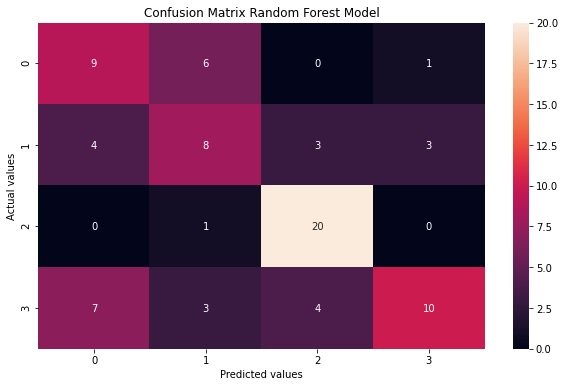

In [ ]:
plt.figure(figsize=(10,6))
cm2 = confusion_matrix(y_test, y_pred_forest)
sns.heatmap(cm2, annot=True, fmt="d")
plt.title('Confusion Matrix Random Forest Model')
plt.xlabel('Predicted values')
plt.ylabel("Actual values")
plt.show()

In [ ]:
print(classification_report(y_true=y_test, y_pred=forest_cl.predict(X_test)))

              precision    recall  f1-score   support

   Confident       0.45      0.56      0.50        16
    Positive       0.44      0.44      0.44        18
  Reflective       0.74      0.95      0.83        21
     Tension       0.71      0.42      0.53        24

    accuracy                           0.59        79
   macro avg       0.59      0.59      0.58        79
weighted avg       0.61      0.59      0.58        79



In [ ]:
feature_forest= forest_cl.feature_importances_
feature_forest

array([0.02598233, 0.02930332, 0.06233065, 0.06826044, 0.03177274,
       0.03057622, 0.03149282, 0.02253686, 0.06397825, 0.04009822,
       0.02845343, 0.03558308, 0.02899617, 0.02870196, 0.02997323,
       0.0384412 , 0.03385606, 0.03868067, 0.03692416, 0.03888342,
       0.02912491, 0.03776925, 0.02871432, 0.0270426 , 0.03266158,
       0.03390996, 0.03952721, 0.02642496])

In [ ]:
feature_importance_forest = pd.DataFrame({'features': X.columns, 'values': forest_cl.feature_importances_})
feature_importance_forest.sort_values(['values'], ascending=False)

,features,values
3,rmse,0.068260
8,mfcc1,0.063978
2,chroma_stft,0.062331
9,mfcc2,0.040098
26,mfcc19,0.039527
19,mfcc12,0.038883
17,mfcc10,0.038681
15,mfcc8,0.038441
21,mfcc14,0.037769
18,mfcc11,0.036924


#### Logistic Regression

In [ ]:
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
print("Train set score : ", classifier.score(X_train, y_train))
print("Test set score : ", classifier.score(X_test, y_test))

Train set score :  0.5993589743589743
Test set score :  0.5063291139240507


In [ ]:
moy_score= cross_val_score(classifier,X_train,y_train, cv=10).mean()
print("Le score moyen après cross validation: ", moy_score)

Le score moyen après cross validation:  0.4675403225806451


#### 2nd Test with different features


In [ ]:
data_mfcc = data_new.drop(['rollof','spectral_bandwidth','tempo'], axis=1)

In [ ]:
data_mfcc.head()

,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,emotion
0,-477.403545,208.821840,53.219121,24.723424,14.367876,-5.110286,-6.353171,-9.187370,-9.356993,-12.663376,-12.602267,-9.313873,-7.831231,-9.456415,-13.223743,-10.588378,-10.082317,-7.461805,-7.630651,-7.905182,Reflective
1,-139.965088,76.243093,27.372612,51.394221,13.650808,17.814696,11.279373,17.925914,7.956369,8.437056,1.980788,15.252957,-1.057819,0.581064,-9.616723,-0.042193,-4.677395,3.617937,1.225401,0.042073,Confident
2,-75.583760,78.032088,15.082731,43.348206,15.011043,28.404307,4.508613,11.982719,-1.297526,11.569887,-9.393426,2.965207,0.600793,-0.284353,-4.880321,3.063496,-5.170363,1.931085,-8.336721,-2.113196,Confident
3,-442.773802,187.344121,108.573449,44.989389,17.877664,11.240613,9.177898,9.127807,10.643879,10.833942,9.429106,7.562426,4.229921,-1.432589,-6.640527,-7.711695,-4.290384,0.279921,2.373840,1.568860,Reflective
4,-233.070087,43.817584,51.189356,46.896953,29.670171,42.594199,11.525458,5.964901,-9.576013,6.678967,13.304457,8.633898,4.014423,-0.513175,0.146302,9.869946,9.779934,6.187625,1.051328,-0.174738,Confident


In [ ]:
y = data_mfcc['emotion']
X = data_mfcc.drop('emotion', axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
X_train = std.fit_transform(X_train)
X_test = std.transform(X_test)

In [ ]:
forest_mfcc= RandomForestClassifier()
forest_mfcc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
y_pred_forest_mfcc=forest_mfcc.predict(X_test)

In [ ]:
print(classification_report(y_true=y_test, y_pred=forest_mfcc.predict(X_test)))

              precision    recall  f1-score   support

   Confident       0.50      0.62      0.56        16
    Positive       0.47      0.50      0.49        18
  Reflective       0.74      0.95      0.83        21
     Tension       0.69      0.38      0.49        24

    accuracy                           0.61        79
   macro avg       0.60      0.61      0.59        79
weighted avg       0.62      0.61      0.59        79



It seems we have better results erasing some correlated features. Let's do a grid search

In [ ]:
from sklearn.model_selection import GridSearchCV
params = {"min_samples_leaf" : [5, 10],
          'max_features' : [1, 2, 5],
          'n_estimators' : [50, 100],
          }

grid_search = GridSearchCV(cv=4, estimator = RandomForestClassifier(), param_grid = params, verbose=3).fit(X_train, y_train)

Fitting 4 folds for each of 12 candidates, totalling 48 fits
[CV] max_features=1, min_samples_leaf=5, n_estimators=50 .............
[CV]  max_features=1, min_samples_leaf=5, n_estimators=50, score=0.500, total=   0.1s
[CV] max_features=1, min_samples_leaf=5, n_estimators=50 .............
[CV]  max_features=1, min_samples_leaf=5, n_estimators=50, score=0.487, total=   0.1s
[CV] max_features=1, min_samples_leaf=5, n_estimators=50 .............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV]  max_features=1, min_samples_leaf=5, n_estimators=50, score=0.474, total=   0.1s
[CV] max_features=1, min_samples_leaf=5, n_estimators=50 .............
[CV]  max_features=1, min_samples_leaf=5, n_estimators=50, score=0.590, total=   0.1s
[CV] max_features=1, min_samples_leaf=5, n_estimators=100 ............
[CV]  max_features=1, min_samples_leaf=5, n_estimators=100, score=0.526, total=   0.1s
[CV] max_features=1, min_samples_leaf=5, n_estimators=100 ............
[CV]  max_features=1, min_samples_leaf=5, n_estimators=100, score=0.500, total=   0.1s
[CV] max_features=1, min_samples_leaf=5, n_estimators=100 ............
[CV]  max_features=1, min_samples_leaf=5, n_estimators=100, score=0.513, total=   0.1s
[CV] max_features=1, min_samples_leaf=5, n_estimators=100 ............
[CV]  max_features=1, min_samples_leaf=5, n_estimators=100, score=0.564, total=   0.1s
[CV] max_features=1, min_samples_leaf=10, n_estimators=50 ............
[CV]  max_features=1, min_samples_leaf=10, n_estimator

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    5.5s finished


In [ ]:
grid_search.best_estimator_.score(X_test, y_test)


0.5443037974683544

#### 3rd test on 3 moods

In [ ]:
data2 = data2.drop(['name'], axis=1)

In [ ]:
y = data2['emotion']
X = data2.drop('emotion', axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
X_train = std.fit_transform(X_train)
X_test = std.transform(X_test)

In [ ]:
forest2= RandomForestClassifier()
forest2.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
print(classification_report(y_true=y_test, y_pred=forest2.predict(X_test)))

              precision    recall  f1-score   support

   Confident       0.74      0.67      0.70        21
    Positive       0.48      0.56      0.51        18
  Reflective       0.84      0.80      0.82        20

    accuracy                           0.68        59
   macro avg       0.69      0.67      0.68        59
weighted avg       0.69      0.68      0.68        59



#### PCA trial on the overall dataset



In [ ]:
from sklearn.decomposition import PCA 
pca = PCA(n_components=2)

In [ ]:
principalComponents = pca.fit_transform(X)
principalDF = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
principalDF.head()

,principal component 1,principal component 2,principal component 3
0,4404.516203,384.408541,88.392664
1,491.519248,-79.530971,-42.732316
2,-3250.963223,202.551731,-33.876490
3,-79.555275,-285.187823,27.591148
4,-1260.459622,-136.005519,-51.290096


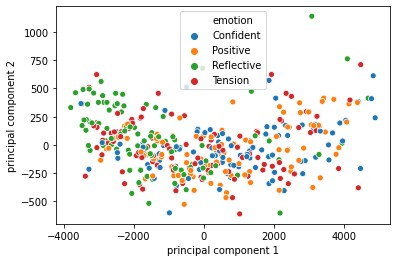

In [ ]:
sns.scatterplot(x=principalDF.columns[0], 
                y=principalDF.columns[1], 
                hue=data_new.columns[-1],
                data = pd.concat([principalDF, data_new.emotion], axis=1))

In [ ]:
pca.explained_variance_ratio_

array([0.98017382, 0.01349178])

#### SVM test

In [ ]:
from sklearn.svm import SVC
clf = SVC(kernel='linear')
clf.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
clf.score(X_test,y_test)

0.5316455696202531

**After trying different models, we can see that it is not so easy to determine the emotions. The "reflective" one seems easier to find out. This characteric is maybe due by the style of the 'reflective music' which is generally more downtempo and can be distinguished easily.
In order to improve these models we could maybe consider working on a larger dataset so the models will have more datas to train on.**